## Predicting Car Prices

This is the second R project in part 7 of the Data quest R course. The aim of this project is to train a k-nearest neighbor algorthim on the data at the [UCI Machine Learning Archive](https://archive.ics.uci.edu/dataset/10/automobile), data collected from 1985 Ward's Automotive Yearbook.

The data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price.   Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.  Actuarians call this process "symboling".  A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year.  This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

The main aim of the project as mentioned before includes creating a KNN model for car pricde production, in order to do this we follow the workflow introduced in the course as presented in the image below.

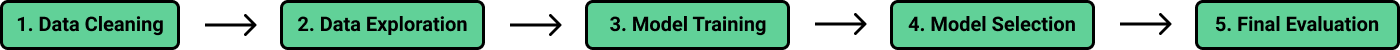

In [ ]:
library(readr)
library(tidyr)
library(dplyr)
install.packages("caret")
library(caret)
library(ggplot2)
library(purrr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘purrr’


The following object is masked from ‘package:caret’:

    lift




In [ ]:
cars <- read.csv("imports-85.data")

In [ ]:
# Fixing the column names since the .data file reads headers incorrectly
colnames(cars) <- c(
  "symboling",
  "normalized_losses",
  "make",
  "fuel_type",
  "aspiration",
  "num_doors",
  "body_style",
  "drive_wheels",
  "engine_location",
  "wheel_base",
  "length",
  "width",
  "height",
  "curb_weight",
  "engine_type",
  "num_cylinders",
  "engine_size",
  "fuel_system",
  "bore",
  "stroke",
  "compression_ratio",
  "horsepower",
  "peak_rpm",
  "city_mpg",
  "highway_mpg",
  "price"
)

In [ ]:
# Removing non-numerical columns and removing missing data
cars <- cars %>%
  select(
    symboling, wheel_base, length, width, height, curb_weight,
    engine_size, bore, stroke, compression_ratio, horsepower,
    peak_rpm, city_mpg, highway_mpg, price
  ) %>%
  filter(
    stroke != "?",
    bore != "?",
    horsepower != "?",
    peak_rpm != "?",
    price != "?"
  ) %>%
  mutate(
    stroke = as.numeric(stroke),
    bore = as.numeric(bore),
    horsepower = as.numeric(horsepower),
    peak_rpm = as.numeric(peak_rpm),
    price = as.numeric(price)
  )

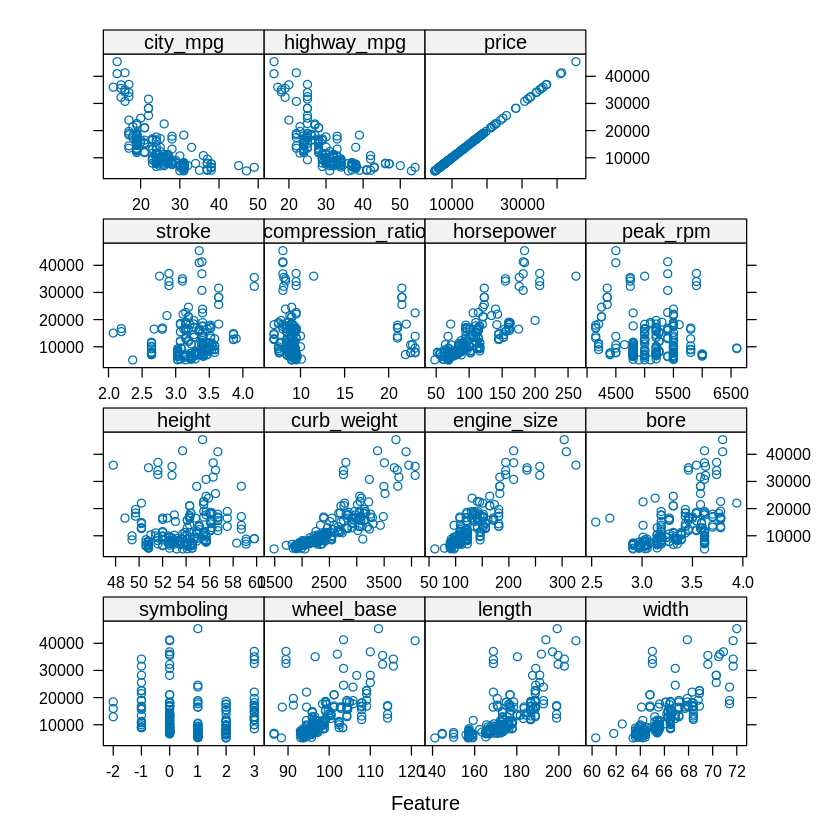

In [ ]:
# Examining Relationships Between Predictors
library(caret)
featurePlot(cars, cars$price)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


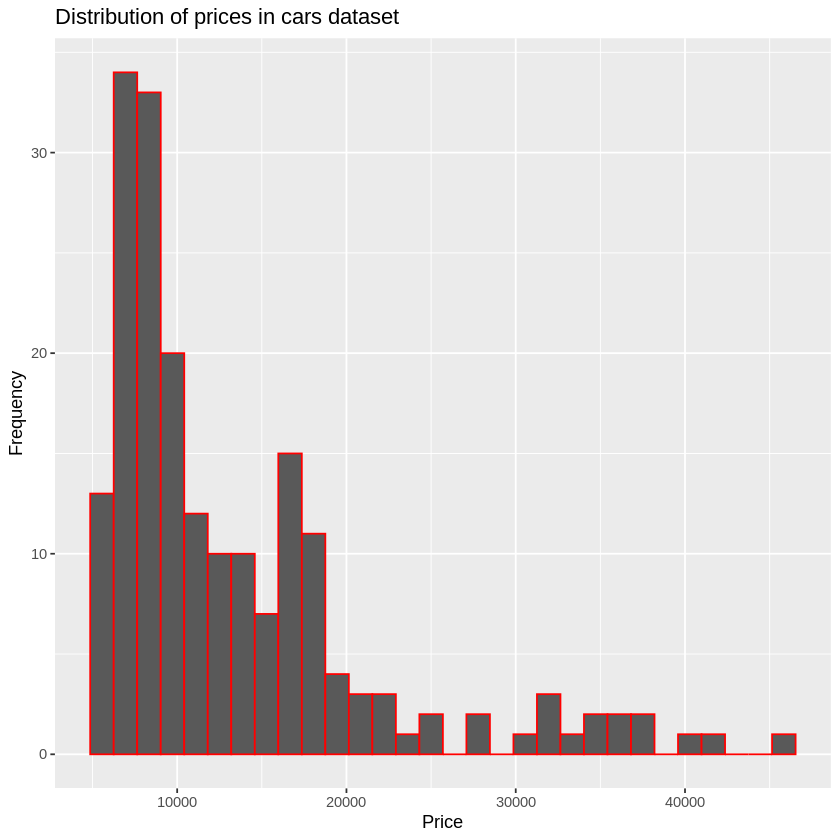

In [ ]:
# There looks to be a somewhat positive relationship between horsepower and price. City MPG and highway MPG look positive too, but there's a curious grouping that looks like it pops up. Many features look like they plateau in terms of price (ie even as we increase, price does not increase). Height seems not to have any meaningful relationship with price since the dots look like an evenly scattered plot.


ggplot(cars, aes(x = price)) +
  geom_histogram(color = "red") +
  labs(
    title = "Distribution of prices in cars dataset",
    x = "Price",
    y = "Frequency"
  )

In [ ]:
#It looks like there's a reasonably even distirbution of the prices in the dataset, so there are no outliers.  There are 2 cars whose price is zero, so this might be suspect. This only represents 1% of the entire dataset, so it shouldn't have too much impact on predictions, especially if we use a high number of neighbors.

# Setting up the train-test split

split_indices <- createDataPartition(cars$price, p = 0.8,  list = FALSE)
train_cars <- cars[split_indices,]
test_cars <- cars[-split_indices,]

In [ ]:
# 5-fold cross-validation
five_fold_control <- trainControl(method = "cv", number = 5)

tuning_grid <- expand.grid(k = 1:20)

In [ ]:
# Creating a model based on all the features
full_model <- train(price ~ .,
                    data = train_cars,
                    method = "knn",
                    trControl = five_fold_control,
                    tuneGrid = tuning_grid,
                    preProcess = c("center", "scale"))

In [ ]:
# Final model evaluation

predictions <- predict(full_model, newdata = test_cars)
postResample(pred = predictions, obs = test_cars$price)

RMSE     Rsquared          MAE 
2332.0542685    0.9283088 1618.5000000

a model with an R-squared value of 0.9 means that approximately 90% of the variance in the dependent variable is explained by the independent variables. This suggests a strong relationship between the variables and indicates that the model provides a good fit to the data.

great performance from model as indicated by RMSE and MAE values.